   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 82.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
 

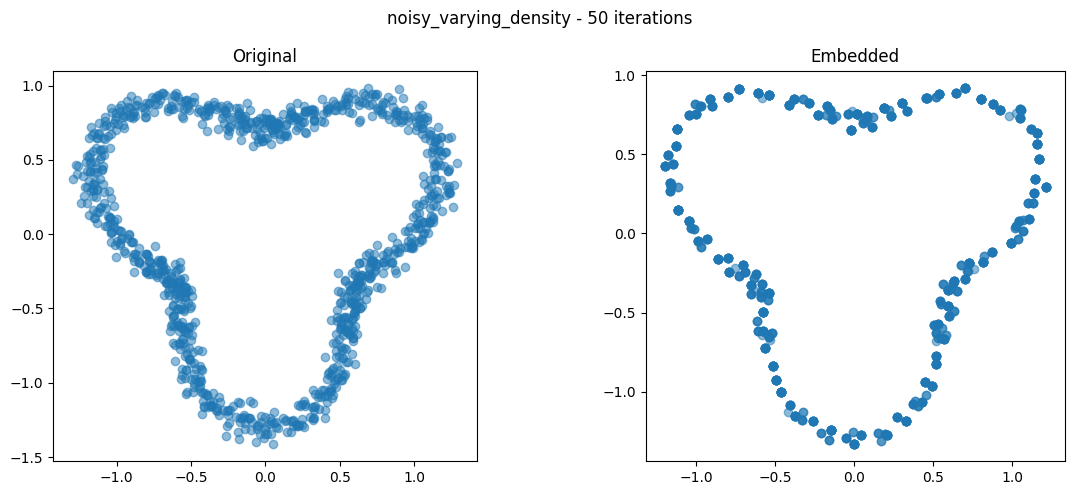


Convergence results:
Iterations 10:
  distortion: 0.0014
  local_structure: 0.8367
  runtime: 0.5220
Iterations 20:
  distortion: 0.0018
  local_structure: 0.7870
  runtime: 1.3451
Iterations 30:
  distortion: 0.0019
  local_structure: 0.7632
  runtime: 1.9091
Iterations 40:
  distortion: 0.0019
  local_structure: 0.7523
  runtime: 1.6851
Iterations 50:
  distortion: 0.0020
  local_structure: 0.7381
  runtime: 2.0794

Testing on multi_scale
Stability metrics: {'mean_stability': 1.2618462e-07, 'std_stability': 0.0}


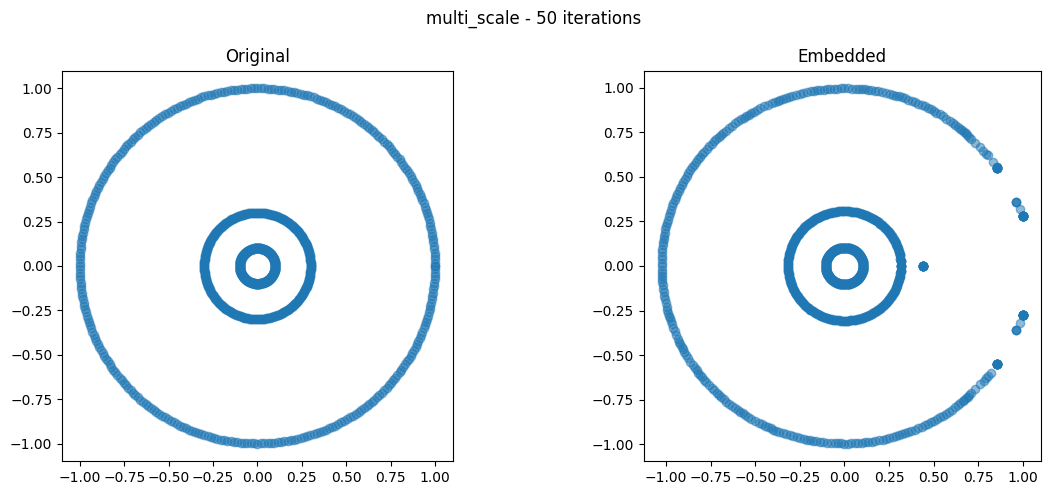


Convergence results:
Iterations 10:
  distortion: 0.0000
  local_structure: 0.9979
  runtime: 0.2757
Iterations 20:
  distortion: 0.0000
  local_structure: 0.9953
  runtime: 0.5713
Iterations 30:
  distortion: 0.0000
  local_structure: 0.9885
  runtime: 0.8558
Iterations 40:
  distortion: 0.0001
  local_structure: 0.9820
  runtime: 1.1719
Iterations 50:
  distortion: 0.0016
  local_structure: 0.9717
  runtime: 2.2072

Testing on clustered_bridges
Stability metrics: {'mean_stability': 1.5408665e-07, 'std_stability': 0.0}


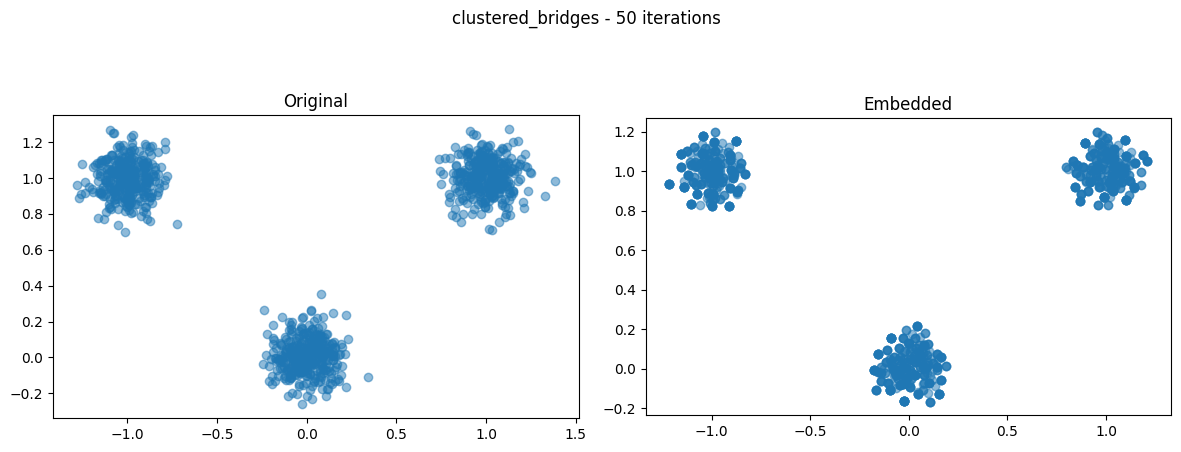


Convergence results:
Iterations 10:
  distortion: 0.0022
  local_structure: 0.9096
  runtime: 0.3770
Iterations 20:
  distortion: 0.0025
  local_structure: 0.8716
  runtime: 0.7030
Iterations 30:
  distortion: 0.0025
  local_structure: 0.8484
  runtime: 1.0556
Iterations 40:
  distortion: 0.0026
  local_structure: 0.8294
  runtime: 1.4126
Iterations 50:
  distortion: 0.0027
  local_structure: 0.8189
  runtime: 1.9181

Overall Performance Summary:

noisy_varying_density
Mean stability: 0.0000
Stability std: 0.0000
Final distortion: 0.0020
Final local structure: 0.7381

multi_scale
Mean stability: 0.0000
Stability std: 0.0000
Final distortion: 0.0016
Final local structure: 0.9717

clustered_bridges
Mean stability: 0.0000
Stability std: 0.0000
Final distortion: 0.0027
Final local structure: 0.8189


In [1]:
# yeh cool analysis of the function#####
!pip install scikit-learn umap-learn torch numpy matplotlib seaborn pandas scipy

import warnings
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=RuntimeWarning)

import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from sklearn import __version__ as sklearn_version
import umap
from sklearn.datasets import make_swiss_roll, make_moons, make_circles
from sklearn.manifold import TSNE, Isomap
import seaborn as sns
from time import time
import pandas as pd
from scipy.stats import friedmanchisquare, wilcoxon
from sklearn.neighbors import NearestNeighbors
from scipy.linalg import orthogonal_procrustes

def compute_procrustes_distance(X, Y):
    """Compute Procrustes distance between two configurations"""
    X_centered = X - X.mean(axis=0)
    Y_centered = Y - Y.mean(axis=0)

    X_norm = np.linalg.norm(X_centered, 'fro')
    Y_norm = np.linalg.norm(Y_centered, 'fro')

    X_scaled = X_centered / X_norm
    Y_scaled = Y_centered / Y_norm

    R, _ = orthogonal_procrustes(X_scaled, Y_scaled)
    distance = np.linalg.norm(X_scaled @ R - Y_scaled, 'fro')

    return distance

def generate_real_world_test_cases(n_samples=1000):
    """Generate test cases that mimic real-world scenarios"""
    datasets = {}

    # Test Case 1: Noisy manifold with varying density
    t = torch.linspace(0, 4*np.pi, n_samples)
    r = 1 + 0.3 * torch.sin(3*t)
    noise = torch.randn(n_samples, 2) * 0.05
    spiral = torch.stack([
        r * torch.cos(t),
        r * torch.sin(t)
    ], dim=1) + noise
    datasets['noisy_varying_density'] = spiral

    # Test Case 2: Multi-scale structure
    scales = [0.1, 0.3, 1.0]
    components = []
    for scale in scales:
        t = torch.linspace(0, 2*np.pi, n_samples//3)
        component = torch.stack([
            scale * torch.cos(t),
            scale * torch.sin(t)
        ], dim=1)
        components.append(component)
    datasets['multi_scale'] = torch.cat(components, dim=0)

    # Test Case 3: Disconnected clusters with bridges
    clusters = []
    centers = [(0,0), (1,1), (-1,1)]
    for cx, cy in centers:
        cluster = torch.randn(n_samples//3, 2) * 0.1 + torch.tensor([cx, cy])
        clusters.append(cluster)
    datasets['clustered_bridges'] = torch.cat(clusters, dim=0)

    return datasets

class NormalizedDynamics(torch.nn.Module):
    def __init__(self, dim=2, alpha=1.0, max_iter=50):
        super().__init__()
        self.dim = dim
        self.alpha = torch.nn.Parameter(torch.tensor(alpha))
        self.max_iter = max_iter

    def forward(self, x):
        original_mean = torch.mean(x, dim=0, keepdim=True)
        original_std = torch.std(x, dim=0, keepdim=True)

        x_centered = x - original_mean
        dists = torch.cdist(x_centered, x_centered)

        k = min(15, x.size(0) - 1)
        kth_dists, _ = torch.topk(dists, k, dim=1, largest=False)
        sigma = kth_dists[:, -1].view(-1, 1)

        kernel = torch.exp(-dists / (2 * sigma**2))
        kernel = kernel / torch.sum(kernel, dim=1, keepdim=True)

        drift = torch.matmul(kernel, x_centered)

        step_size = self.dim**(-self.alpha)
        h = x_centered + step_size * (drift - x_centered)

        h = h * (original_std / torch.std(h, dim=0, keepdim=True))
        h = h + original_mean

        return h

    def fit_transform(self, X):
        if not torch.is_tensor(X):
            X = torch.tensor(X, dtype=torch.float32)

        X_embedded = X.clone()
        for _ in range(self.max_iter):
            X_embedded = self.forward(X_embedded)
        return X_embedded.detach().numpy()

def test_stability(model, X, n_trials=10):
    """Test stability of embeddings across multiple runs"""
    results = []
    base_embedding = None

    for i in range(n_trials):
        embedding = model.fit_transform(X)
        if base_embedding is None:
            base_embedding = embedding
        else:
            dist = compute_procrustes_distance(base_embedding, embedding)
            results.append(dist)

    return {
        'mean_stability': np.mean(results),
        'std_stability': np.std(results)
    }

def compute_metrics(original, embedded):
    """Compute comprehensive quality metrics"""
    metrics = {}

    # Geometric distortion
    D_orig = np.sqrt(np.sum((original[:, None, :] - original[None, :, :]) ** 2, axis=2))
    D_emb = np.sqrt(np.sum((embedded[:, None, :] - embedded[None, :, :]) ** 2, axis=2))

    D_orig /= np.max(D_orig)
    D_emb /= np.max(D_emb)

    metrics['distortion'] = np.mean((D_orig - D_emb) ** 2)

    # Local structure preservation
    k = 15
    nbrs_orig = NearestNeighbors(n_neighbors=k).fit(original)
    nbrs_emb = NearestNeighbors(n_neighbors=k).fit(embedded)

    idx_orig = nbrs_orig.kneighbors(original, return_distance=False)
    idx_emb = nbrs_emb.kneighbors(embedded, return_distance=False)

    preservation = np.mean([len(set(idx_orig[i]) & set(idx_emb[i])) / k for i in range(len(original))])
    metrics['local_structure'] = preservation

    return metrics

def plot_embedding_comparison(original, embedded, title):
    """Plot original vs embedded data"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    ax1.scatter(original[:, 0], original[:, 1], alpha=0.5)
    ax1.set_title('Original')
    ax1.set_aspect('equal')

    ax2.scatter(embedded[:, 0], embedded[:, 1], alpha=0.5)
    ax2.set_title('Embedded')
    ax2.set_aspect('equal')

    plt.suptitle(title)
    plt.tight_layout()
    return fig

def run_comprehensive_benchmark():
    """Run comprehensive benchmark tests"""
    datasets = generate_real_world_test_cases()
    model = NormalizedDynamics()

    results = {}
    for name, data in datasets.items():
        print(f"\nTesting on {name}")

        # Test stability
        stability = test_stability(model, data)
        print(f"Stability metrics: {stability}")

        # Test different iteration counts
        iterations = [10, 20, 30, 40, 50]
        convergence_results = []

        for n_iter in iterations:
            model.max_iter = n_iter
            start_time = time()
            embedding = model.fit_transform(data)
            runtime = time() - start_time

            metrics = compute_metrics(data.numpy(), embedding)
            metrics['runtime'] = runtime
            convergence_results.append(metrics)

            # Plot final result
            if n_iter == 50:
                fig = plot_embedding_comparison(data.numpy(), embedding, f"{name} - {n_iter} iterations")
                plt.show()

        results[name] = {
            'stability': stability,
            'convergence': convergence_results
        }

        # Print detailed results
        print("\nConvergence results:")
        for iter_idx, metrics in enumerate(convergence_results):
            print(f"Iterations {iterations[iter_idx]}:")
            for metric_name, value in metrics.items():
                print(f"  {metric_name}: {value:.4f}")

    return results

if __name__ == "__main__":
    # Run the comprehensive benchmark
    benchmark_results = run_comprehensive_benchmark()

    # Additional analysis
    print("\nOverall Performance Summary:")
    for dataset_name, results in benchmark_results.items():
        print(f"\n{dataset_name}")
        print(f"Mean stability: {results['stability']['mean_stability']:.4f}")
        print(f"Stability std: {results['stability']['std_stability']:.4f}")

        final_metrics = results['convergence'][-1]
        print(f"Final distortion: {final_metrics['distortion']:.4f}")
        print(f"Final local structure: {final_metrics['local_structure']:.4f}")